# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA1
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
22th April 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA1

#### Scenario:
This is a data set which contains over 65K attempts to access a firewall. There is a single categorical feature “Action”, that contains 4 categories – “allow, deny, drop, reset-both”.
Your task is to create a classification model that will predict the class of incoming traffic to the firewall. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.preprocessing as preproc
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# read file
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]

In [12]:
new_df = df[['Source Port', 'Destination Port', 'Action']]
new_df.head()

,Source Port,Destination Port,Action
0,57222,53,allow
1,56258,3389,allow
2,6881,50321,allow
3,50553,3389,allow
4,50002,443,allow


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source Port       65532 non-null  int64 
 1   Destination Port  65532 non-null  int64 
 2   Action            65532 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [25]:
logs_df = new_df[new_df['Action'].isin(["allow","deny","drop","reset-both"])]
logs_df.head()

,Source Port,Destination Port,Action
0,57222,53,allow
1,56258,3389,allow
2,6881,50321,allow
3,50553,3389,allow
4,50002,443,allow


In [27]:
missing_values = logs_df.isnull().sum()
print(missing_values)

Source Port         0
Destination Port    0
Action              0
dtype: int64


In [29]:
logs_df.describe()

,Source Port,Destination Port
count,65532.000000,65532.000000
mean,49391.969343,10577.385812
std,15255.712537,18466.027039
min,0.000000,0.000000
25%,49183.000000,80.000000
50%,53776.500000,445.000000
75%,58638.000000,15000.000000
max,65534.000000,65535.000000


Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


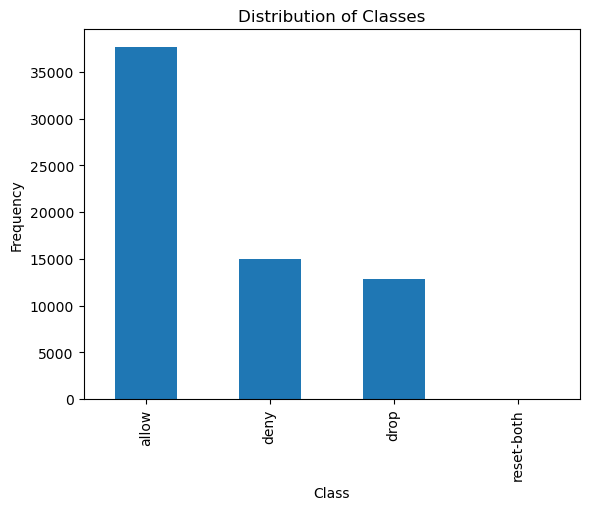

In [19]:
action_counts = new_df['Action'].value_counts()
print(action_counts)

action_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

In [21]:
# Encode categorical variable into numeric values
df_cat = new_df['Action'].astype('category').cat.codes
print(df_cat)

0        0
1        0
2        0
3        0
4        0
        ..
65527    0
65528    0
65529    2
65530    2
65531    2
Length: 65532, dtype: int8


C:\Users\tahro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


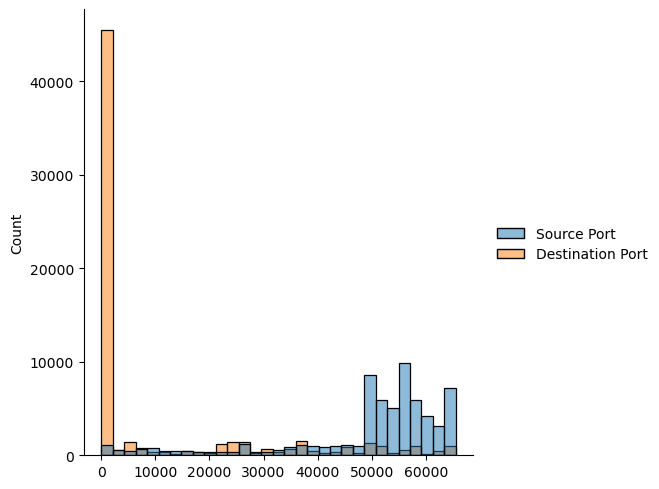

In [31]:
sns.displot(logs_df);

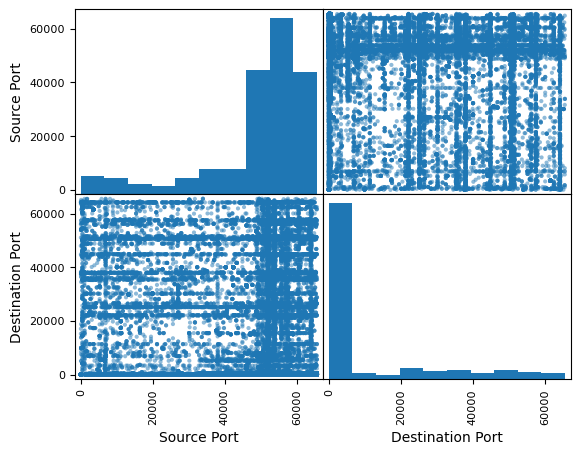

In [30]:
scatter_matrix(logs_df)
plt.show()

C:\Users\tahro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


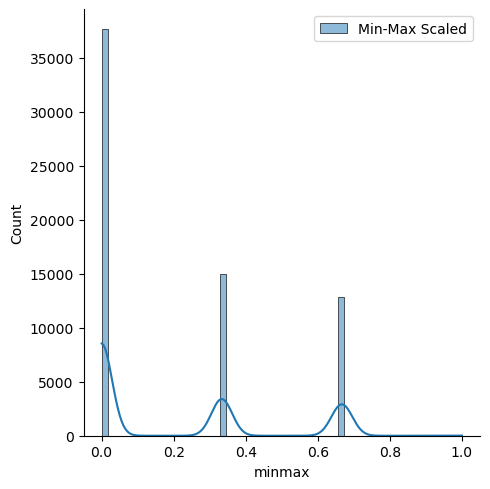

In [9]:
df['minmax'] = preprocessing.minmax_scale(df_cat)

sns.displot(df['minmax'], kde=True, label='Min-Max Scaled')
plt.legend()
plt.show()

Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

### References

https://www.jamesparker.dev/what-is-the-role-of-firewall-logs-in-security-analysis/
https://developer.ibm.com/tutorials/build-and-test-your-first-machine-learning-model-using-python-and-scikit-learn/
https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/